### Setup

In [2]:
import ISLP
import pandas as pd
import numpy as np

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.plotting.backend = "plotly"
pio.templates.default = 'plotly_white'


class matplotlib_backend:
    def __enter__(self):
        self.original_backend = pd.options.plotting.backend
        pd.options.plotting.backend = "matplotlib"

    def __exit__(self, exc_type, exc_val, exc_tb):
        pd.options.plotting.backend = self.original_backend


px.colors.qualitative.swatches()

In [4]:
wage = ISLP.load_data('Wage').rename(columns={'maritl': 'marital_status', 'health_ins': 'health_insurance'})

### Replicate First Plots in Matplotlib / Seaborn / Plotly

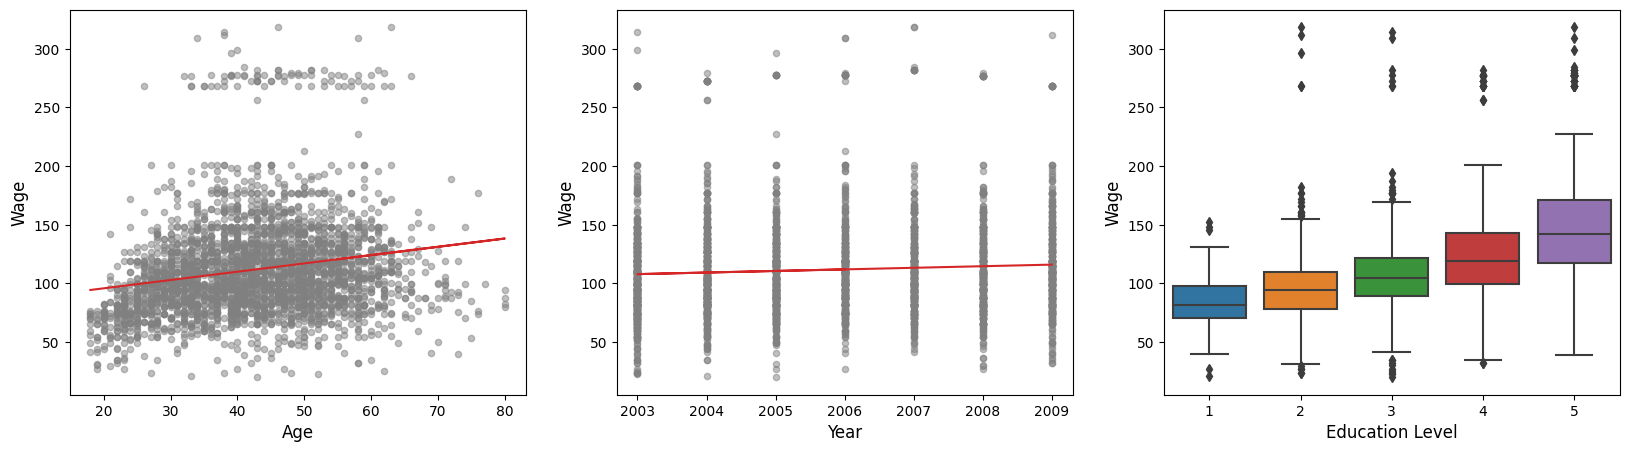

In [29]:
with matplotlib_backend():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    wage.plot.scatter(x='age', y='wage', ax=axes[0], color='grey', alpha=0.5)
    wage.plot.scatter(x='year', y='wage', ax=axes[1], color='grey', alpha=0.5)
    sns.boxplot(x='education', y='wage', data=wage, ax=axes[2])

    # Format x-axis tick labels for education levels
    education_labels = [item.get_text() for item in axes[2].get_xticklabels()]
    shortened_labels = [label[0] for label in education_labels]
    axes[2].set_xticklabels(shortened_labels)
    
    for ax in axes[:2]: # Add regression line to scatter plots
        x = wage[ax.get_xlabel()]
        y = wage[ax.get_ylabel()]
        m, c = np.polyfit(x, y, 1)
        ax.plot(x, m*x + c, color='#D62728')

    axes[0].set_xlabel('Age'), axes[1].set_xlabel('Year'), axes[2].set_xlabel('Education Level')
    for ax in axes:
        ax.set_ylabel('Wage')
        ax.xaxis.label.set_size(12), ax.yaxis.label.set_size(12)

    plt.show()

In [35]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('', '', ''))

# 1. Scatter Plot: Age vs Wage
scatter_age_wage = px.scatter(wage, x='age', y='wage', trendline='lowess', color_discrete_sequence=['grey'], opacity=0.5, trendline_color_override='#D62728')
fig.add_trace(scatter_age_wage.data[0], row=1, col=1), fig.add_trace(scatter_age_wage.data[1], row=1, col=1)

# 2. Scatter Plot: Year vs Wage
scatter_year_wage = px.scatter(wage, x='year', y='wage', trendline='ols', color_discrete_sequence=['grey'], opacity=0.5, trendline_color_override='#D62728')
fig.add_trace(scatter_year_wage.data[0], row=1, col=2), fig.add_trace(scatter_year_wage.data[1], row=1, col=2)

# 3. Box Plot: Wage by Education Level
boxplot_education_wage = px.box(
    wage
    , x='education'
    , y='wage'
    , color='education'
    , color_discrete_sequence=px.colors.qualitative.D3
    , category_orders={'education': ['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']}
)
for trace in boxplot_education_wage.data:
    # trace['marker']['color'] = 'grey'
    fig.add_trace(trace, row=1, col=3)

fig.update_layout()
fig.show()